In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
import ugent

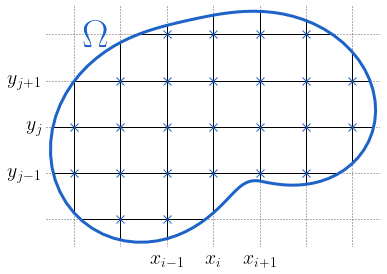

In [7]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from math import sin, cos, pi

def f(t):
    r = (4+np.cos(2*pi*(t+.7))**2)**3
    
    alpha = 0.4
    s = 2*(alpha-1)*t**3 + (3 - 3*alpha)*t**2 + alpha*t
    s += .4
    s *= 2*pi
    
    return r*np.sin(s), r*np.cos(s)


ts = np.linspace(0, 1, 100)

vertices = np.vstack(f(ts)).T
codes = np.full(len(ts), Path.LINETO)
codes[0] = Path.MOVETO
codes[-1] = Path.CLOSEPOLY
path = Path(vertices, codes)

xmin, ymin = np.min(vertices, axis=0)
xmax, ymax = np.max(vertices, axis=0)
dx, dy = xmax-xmin, ymax-ymin

for settings in [
    dict(name="the_method_grid.pdf", intersection_ms=8, side_points=False, mid_points=False),
    # dict(name="the_method_grid_zoomed.pdf", intersection_ms=0, side_points=True, mid_points=False, corners=True),
    # dict(name="the_method_grid_zoomed_mid_corners.pdf", intersection_ms=0, side_points=True, mid_points=True, corners=True),
    # dict(name="the_method_grid_zoomed_mid.pdf", intersection_ms=0, side_points=True, mid_points=True, corners=False),
]:
    patch = PathPatch(path, edgecolor=ugent.blauw, fill=None, lw=3, zorder=10)
    fig, ax = plt.subplots(figsize=(6, 6))
    border_low = 0.015
    border_high = 0.015
    plt.xlim(xmin-border_low*dx, xmax+border_high*dx)
    plt.ylim(ymin-border_low*dx, ymax+border_high*dx)
    ax.add_patch(patch)
    ax.axis(False)
    ax.set_aspect('equal')


    background_gridargs = dict(alpha=0.6, color=ugent.zwart, dashes=(1,2), lw=1, zorder=1)
    foreground_gridargs = dict(alpha=1, color=ugent.zwart, lw=1, clip_path=patch, zorder=2)
    xs = np.linspace(xmin, xmax, 15)[1::2]
    ys = np.linspace(ymin, ymax, 11)[1::2]
    for i in xs:
        ax.axvline(i, **background_gridargs)
        ax.axvline(i, **foreground_gridargs)
    for i in ys:
        ax.axhline(i, **background_gridargs)
        ax.axhline(i, **foreground_gridargs)

        
    if settings["intersection_ms"] > 0:
        intersections = []
        for x in xs:
            for y in ys:
                if patch.contains_point(patch.get_transform().transform((x, y))):
                    intersections.append((x, y))
        ax.plot(*zip(*list(intersections)), "x", color=ugent.blauw, zorder=11, ms=settings["intersection_ms"])
    
    if settings["side_points"]:
        n = 5
        ix = 3
        iy = 2
        xs_side = np.linspace(xs[ix], xs[ix+1], n)
        ys_side = np.linspace(ys[iy], ys[iy+1], n)
        
        corners = settings["corners"]
        
        midpoints = []
        if settings["mid_points"]:
            for x in xs_side[1:-1]:
                for y in ys_side[1:-1]:
                    midpoints.append((x, y))
        ax.plot(*zip(*list(midpoints)), "o", color=ugent.rood, zorder=11, ms=2)
        points = []
        for i in range(0 if corners else 1, n-1):
            points.append((xs_side[-1-i], ys[iy]))
            points.append((xs_side[i], ys[iy+1]))
            points.append((xs[ix], ys_side[i]))
            points.append((xs[ix+1], ys_side[-1-i]))
        ax.plot(*zip(*list(points)), "o", color=ugent.rood, zorder=11, ms=3)
        

    textargs = dict(size=20)
    ax.text(xmin-.03*dx, ys[1], "$y_{j-1}$", **textargs, ha="right", va="center")
    ax.text(xmin-.03*dx, ys[2], "$y_{j}$", **textargs, ha="right", va="center")
    ax.text(xmin-.03*dx, ys[3], "$y_{j+1}$", **textargs, ha="right", va="center")

    ax.text(xs[2], ymin-.03*dy, "$x_{i-1}$", **textargs, ha="center", va="top")
    ax.text(xs[3], ymin-.03*dy, "$x_{i}$", **textargs, ha="center", va="top")
    ax.text(xs[4], ymin-.03*dy, "$x_{i+1}$", **textargs, ha="center", va="top")

    ax.text(xmin + .1*dx, ymax-.15*dy, "$\\Omega$", size=40, color=ugent.blauw)

    plt.savefig(settings["name"], bbox_inches='tight')